# Street View Images for Location Stimuli - Historic Single Image Preview

This script will automatically pull the oldest streetview image at a certain coordinate.

In [1]:
import numpy as np
import pandas as pd
import json

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
%matplotlib inline


from PIL import Image
import requests

import streetview

In [2]:
def get_keys(path):
    with open(path) as f:
        return json.load(f)

In [3]:
key_path = ".secret/keys.json"
keys = get_keys(key_path)
API_Key = keys['api_key']
# API_Key = keys['SV_Student_Overflow_Key']

## Helper Function

In [4]:
def rotate_angle(angle, rotate):
    new_angle = angle + rotate
    
    if new_angle > 360:
        new_angle -= 360
    elif new_angle <0:
        new_angle += 360
    
    return new_angle

In [5]:
def getSVimages(lat, lng, rotate=0):  
    images = []

    panoids = pd.DataFrame(streetview.panoids(lat, lng)).dropna().sort_values(['year', 'month'])
    pano = panoids.iloc[0]
    panoid = pano['panoid']

    print(f"Street View Images for ({lat}, {lng}), dated {pano['year']}-{pano['month']}")
    
    for heading in [rotate_angle(a, rotate) for a in [0, 90, 180, 270]]:
        request_url = f'https://maps.googleapis.com/maps/api/streetview?size=600x400&pano={panoid}&heading={heading}&source=outdoor&key={API_Key}'
        # print(f'Heading {heading}: {request_url}')
        images.append(Image.open(requests.get(request_url, stream=True).raw))
    
    fig = plt.figure(figsize=(24., 18.))
    grid = ImageGrid(fig, 111,  # similar to subplot(111)
                     nrows_ncols=(2, 2),  # creates 2x2 grid of axes
                     axes_pad=0.1,  # pad between axes in inch.
                     )
    
    for ax, im in zip(grid, images):
        # Iterating over the grid returns the Axes.
        ax.imshow(im)

    plt.show();
    
    return images       

Street View Images for (42.27529, -83.732831), dated 2007.0-10.0


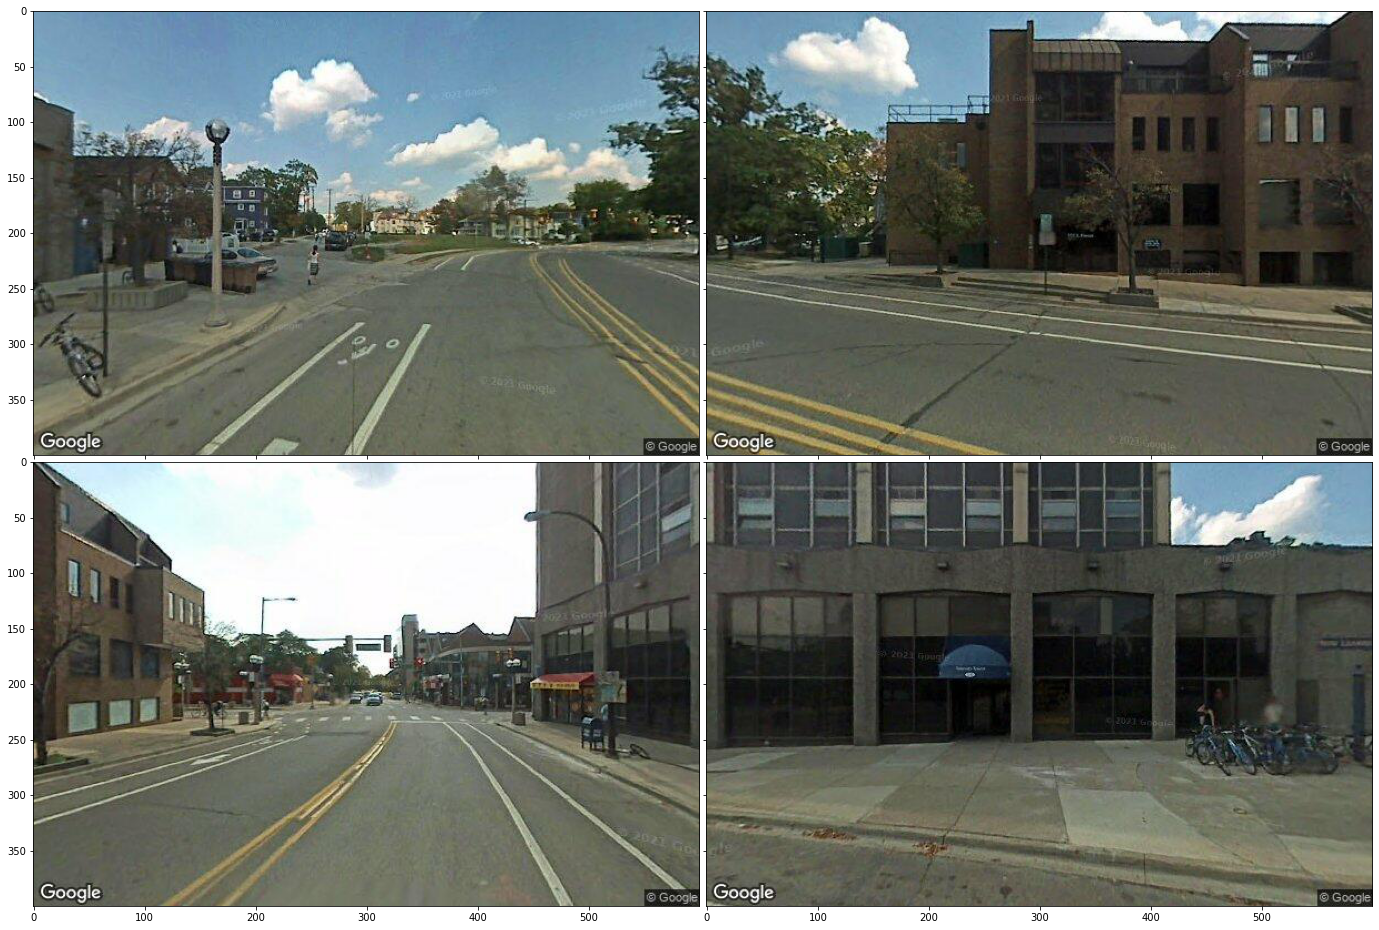

[<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x400 at 0x123D33280>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x400 at 0x123D33A90>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x400 at 0x123D41EE0>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x400 at 0x123D33880>]

In [6]:
getSVimages(42.275290,-83.732831)